### Do I need to know quantum mechanics to use quantum computer?
Many people certainly think that programming quantum computers is terribly complicated. Contrary to appearances, it is enough to have a basic knowledge of Python to be able to write simple codes. All thanks to numerous libraries that greatly facilitate programming in Qiskit.

### Qiskit Aqua
In this part of the guide, we present the Aqua library, which contains the core cross-domain algorithms and supporting logic to run these on a quantum backend, whether a real device or simulator. In the following task, we will use two algorithms: **Shor's** and **Grover's**. Thanks to the library, we do not have to go into detail about each of them, because their operation is quite complicated. We will briefly discuss their operation as their construction will be discussed in the next part of the project.

### Shor's Algorithm
The very purpose of the algorithm is quite simple. The Shore's algorithm enables factorization of the natural number N. As we mentioned before, the algorithm is very complicated. It is divided into a classical and a quantum part. At present, for numbers with low values, it is more profitable to use a classical computer. However, in the case of huge numbers, this algorithm is the most optimal solution. The practical application of this algorithm is breaking cyphers.

First, we need to import the Aer library that will allow us to simulate a quantum algorithm on a classical computer. Then, the necessary algorithm should be imported similarly. We take it from the Aqua library described earlier.

In [9]:
from qiskit import Aer
from qiskit.aqua.algorithms import Shor

Afterwards we have to create a variable, the value of which we want to factorize. In this case, it is number 15. Generally, it is not recommended to break down numbers larger than 21, because simulating this process can put a heavy load on a classic computer.

In [10]:
N=15

The next step is to assign our variable to the algorithm. Just use the 'Shore' command and put the variable in parentheses that we previously assigned a value. We save it in the variable 'shore', which we will use to display the solution.

In [11]:
shor = Shor(N)

Now we have to choose how to execute the algorithm. For this, we will use the previously imported Aer library. Backend is an interface to a quantum system or a classical-quantum simulator. It's best to understand the backend as the machine to do the algorithm's work. In our case, we will use a simulator, the choice of which will be declared by giving the name in brackets. You may also ask what is QASM? It is a set of text instructions to describe and visualize quantum circuits needed to execute a script. As before, we write the result to a variable.

In [12]:
backend = Aer.get_backend('qasm_simulator')

At the very end, we have to call the whole algorithm. To do this, we will use the previously created variables, starting with the 'shore' to be executed. In brackets, we give 'backend' because we have declared in it that the script will be executed via a quantum simulator. The last command is to print the result ('*print(result)*' is enough). In this task, you have to be patient, because a classic computer takes a while to solve it in a quantum way.

In [15]:
result = shor.run(backend)
print("The factors of {} computed by the Shor's algorithm: {}.".format(N, result['factors'][0]))

The factors of 15 computed by the Shor's algorithm: [3, 5].


### Grover's Algorithm
Although the design of this algorithm may look quite complex, (like any quantum algorithm), the purpose of this algorithm is very simple. The algorithm searches a database with N elements in order to find the highlighted element in it. This is a problem similar to a "reverse" phone book lookup. In a book containing N data, we want to find the name of the holder of a given number.

To run this algorithm, everything that we need is the Qiskit Aer backend and Grover algorithm represented by an object. Let's import this.

In [2]:
import qiskit
from qiskit import Aer
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import TruthTableOracle, LogicalExpressionOracle

The next step we need to do is define our truth table. Simply it's just our database and we want to find entries with a state of 1. Its length must be a power of 2. Then we create a new object from TruthTableOracle class (with attached our truth table).

In [3]:
truthTable = '0010100101000001'
oracle = TruthTableOracle(truthTable)

After that we create a new object from Grover class (attached oracle object).

In [4]:
grover = Grover(oracle)
backend = Aer.get_backend('qasm_simulator')
result = grover.run(backend)

To see clear result, we import function which shows us histograms with our results and run it.

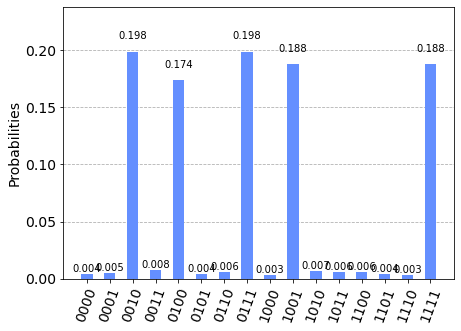

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(result['measurement'])

As can be seen above, the probability of selecting an input with state 1 is greater than with state 0.

We can also work on logical operators - AND, OR, NOT, XOR. It might be easier than the above example, but it's up to you which one you will choose. Let's create one example.

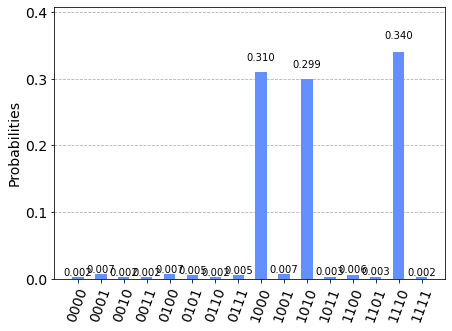

In [7]:
secondOracle = LogicalExpressionOracle('a | (~b & c) | ~d')
grover = Grover(secondOracle)
result = grover.run(backend)
plot_histogram(result['measurement'])

As you can see, result is consistent with expected output and entered data.